
LogisticRegression
****Resultados****
              precision    recall  f1-score   support

           0       0.96      0.92      0.94     25409
           1       0.92      0.96      0.94     25340

    accuracy                           0.94     50749
   macro avg       0.94      0.94      0.94     50749
weighted avg       0.94      0.94      0.94     50749


DecisionTreeClassifier
****Resultados****
              precision    recall  f1-score   support

           0       0.99      0.93      0.96     25409
           1       0.94      0.99      0.96     25340

    accuracy                           0.96     50749
   macro avg       0.96      0.96      0.96     50749
weighted avg       0.96      0.96      0.96     50749


RandomForestClassifier
****Resultados****
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     25409
           1       0.97      0.97      0.97     25340

    accuracy                           0.97     50749
   

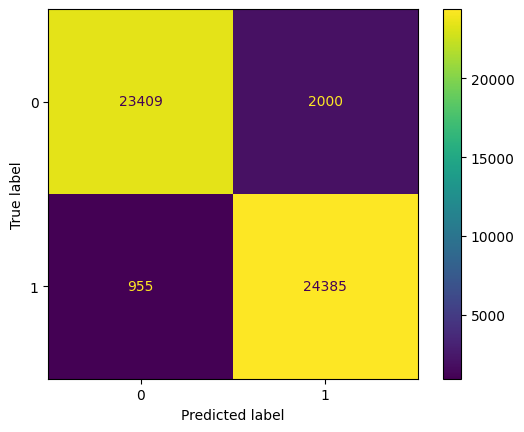

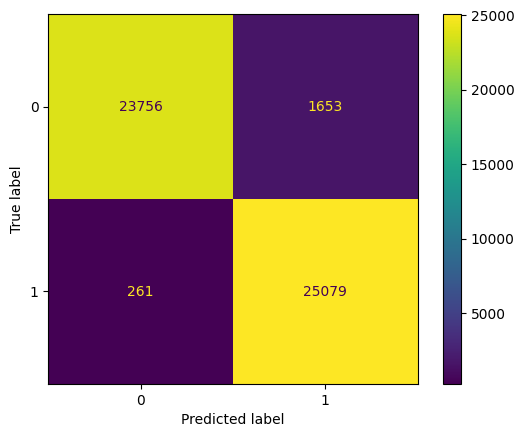

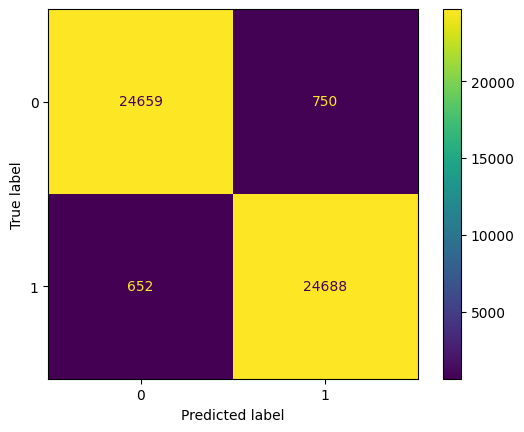

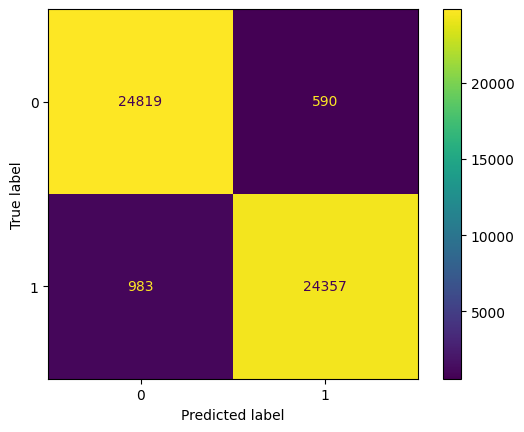

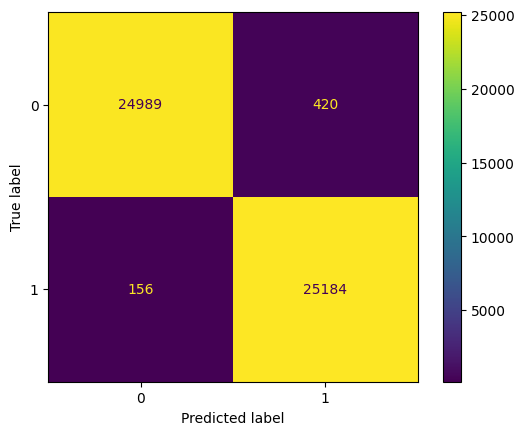

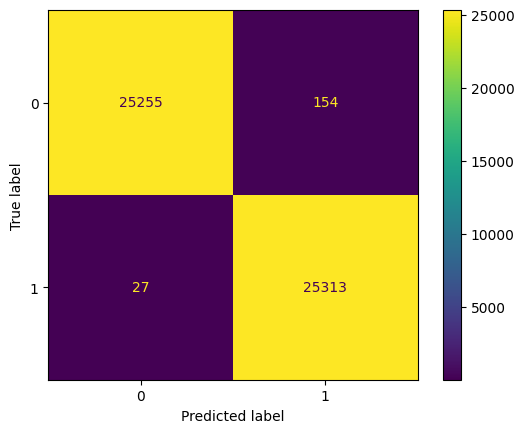

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import numpy as np

%matplotlib inline
SEED = 42

df = pd.read_csv('fraud_dataset_example.csv')
df = df[['isFraud',
       'isFlaggedFraud', 'step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest']]
colunas = {
    'isFraud': 'fraude',
    'isFlaggedFraud':'super_fraude',
    'step':'tempo',
    'type':'tipo',
    'amount':'valor',
    'nameOrig':'cliente1',
    'oldbalanceOrg':'saldo_inicial_c1',
    'newbalanceOrig':'novo_saldo_c1',
    'nameDest':'cliente2',
    'oldbalanceDest':'saldo_inicial_c2',
    'newbalanceDest':'novo_saldo_c2',
}
df = df.rename(columns = colunas)
df = pd.get_dummies(data=df, columns=['tipo'])
df = df.drop(['cliente1', 'cliente2', 'super_fraude'], axis = 1)



smote = SMOTE(random_state=42)


x = df.drop('fraude', axis=1)
y = df['fraude']
x_resampled, y_resampled = smote.fit_resample(x,y)


df_balanced = pd.concat([y_resampled, x_resampled], axis=1)
x = df_balanced.iloc[:, 1:].values
y = df_balanced.iloc[:, 0].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state = SEED)

from sklearn.metrics import classification_report
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier


classifiers = [
    LogisticRegression(max_iter=1000, random_state=SEED),
    DecisionTreeClassifier(max_depth=5, random_state=SEED),
    RandomForestClassifier(max_depth=5, random_state=SEED),
    make_pipeline(StandardScaler(), SVC(C=1, gamma='scale', kernel='rbf', random_state=SEED)),
    GradientBoostingClassifier(n_estimators=100, max_depth=3, random_state=SEED),
    XGBClassifier(n_estimators=100, max_depth=3, random_state=SEED)
]

for clf in classifiers:
    clf.fit(x_train, y_train)
    name = clf.__class__.__name__
    print("\n"+"="*30)
    print(name)
    print('****Resultados****')
    y_pred = clf.predict(x_test)
    print(classification_report(y_test, y_pred))
    
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()


LogisticRegression
****Resultados****
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     30449
           1       0.97      0.97      0.97     30450

    accuracy                           0.97     60899
   macro avg       0.97      0.97      0.97     60899
weighted avg       0.97      0.97      0.97     60899


DecisionTreeClassifier
****Resultados****
              precision    recall  f1-score   support

           0       0.99      0.93      0.96     30449
           1       0.94      0.99      0.96     30450

    accuracy                           0.96     60899
   macro avg       0.96      0.96      0.96     60899
weighted avg       0.96      0.96      0.96     60899


RandomForestClassifier
****Resultados****
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     30449
           1       0.97      0.97      0.97     30450

    accuracy                           0.97     60899
   

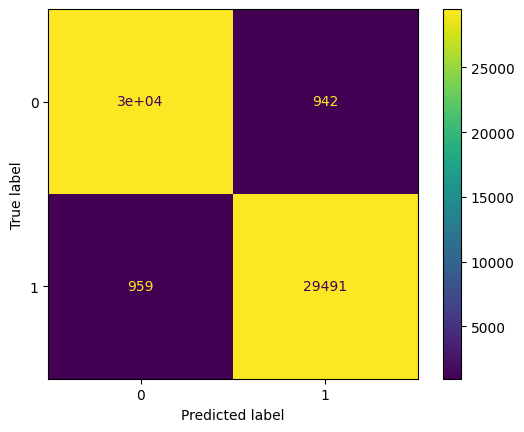

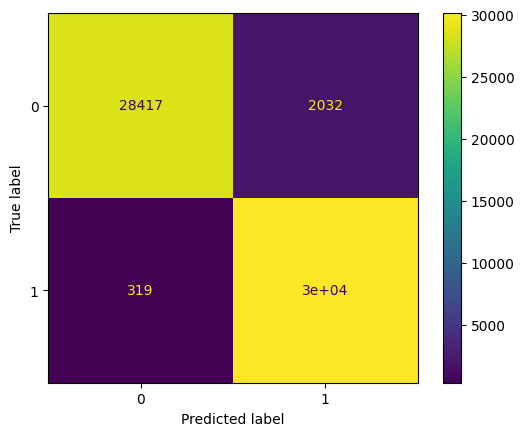

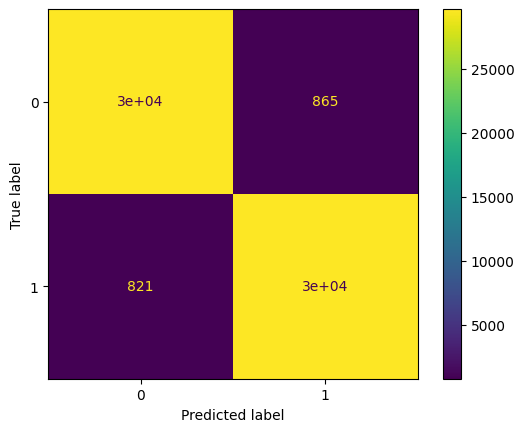

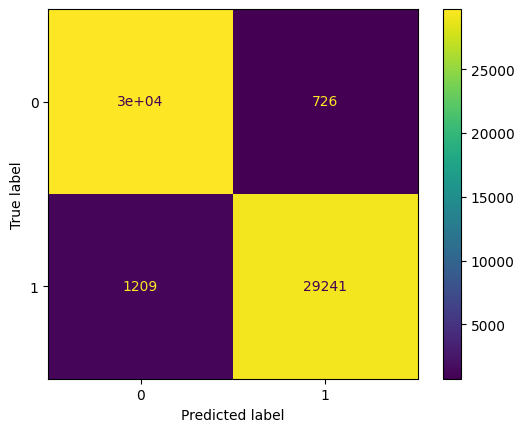

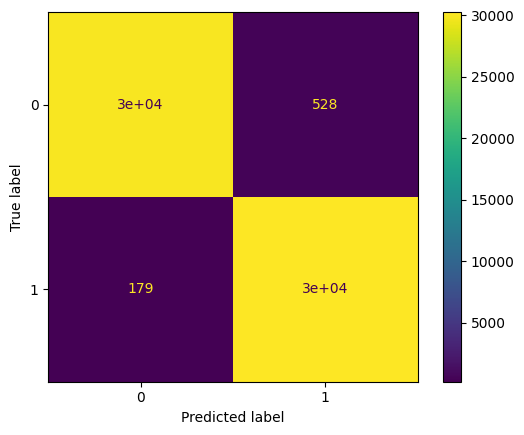

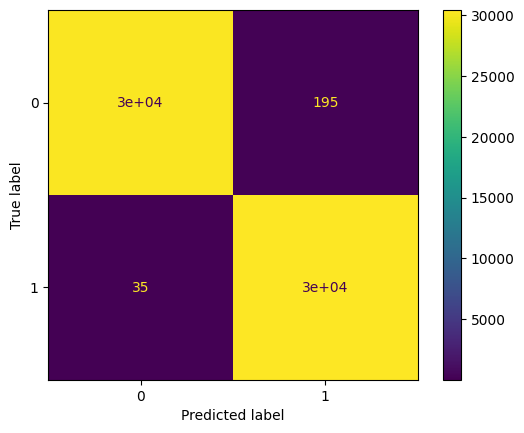

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier


def read_data(file_path):
    df = pd.read_csv(file_path)
    df = df[['isFraud', 'isFlaggedFraud', 'step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
             'nameDest', 'oldbalanceDest', 'newbalanceDest']]
    colunas = {
        'isFraud': 'fraude',
        'isFlaggedFraud': 'super_fraude',
        'step': 'tempo',
        'type': 'tipo',
        'amount': 'valor',
        'nameOrig': 'cliente1',
        'oldbalanceOrg': 'saldo_inicial_c1',
        'newbalanceOrig': 'novo_saldo_c1',
        'nameDest': 'cliente2',
        'oldbalanceDest': 'saldo_inicial_c2',
        'newbalanceDest': 'novo_saldo_c2',
    }
    df = df.rename(columns=colunas)
    df = pd.get_dummies(data=df, columns=['tipo'])
    df = df.drop(['cliente1', 'cliente2', 'super_fraude'], axis=1)
    return df


def balance_data(df):
    smote = SMOTE(random_state=42)
    x = df.drop('fraude', axis=1)
    y = df['fraude']
    x_resampled, y_resampled = smote.fit_resample(x, y)
    df_balanced = pd.concat([y_resampled, x_resampled], axis=1)
    return df_balanced


def split_data(df, test_size, seed):
    x = df.iloc[:, 1:].values
    y = df.iloc[:, 0].values
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)
    return x_train, x_test, y_train, y_test


def train_model(clf, x_train, y_train):
    clf.fit(x_train, y_train)
    return clf


def evaluate_model(clf, x_test, y_test):
    name = clf.__class__.__name__
    print("\n" + "=" * 30)
    print(name)
    print('****Resultados****')
    y_pred = clf.predict(x_test)
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()

def get_classifiers(seed):
    classifiers = [
        LogisticRegression(max_iter=1000, random_state=seed),
        DecisionTreeClassifier(max_depth=5, random_state=seed),
        RandomForestClassifier(max_depth=5, random_state=seed),
        SVC(C=1, gamma='scale', kernel='rbf', random_state=seed),
        GradientBoostingClassifier(n_estimators=100, max_depth=3, random_state=seed),
        XGBClassifier(n_estimators=100, max_depth=3, random_state=seed)
    ]
    return classifiers

def main(file_path, test_size, seed):
    # Carrega os dados
    df = read_data(file_path)

    # Balanceia os dados usando SMOTE
    df_balanced = balance_data(df)

    # Divide o dataset em treino e teste
    x_train, x_test, y_train, y_test = split_data(df_balanced, test_size, seed)

    # Padroniza os dados
    scaler = StandardScaler()
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)

    # Treina os modelos
    classifiers = get_classifiers(seed)
    trained_classifiers = []
    for clf in classifiers:
        trained_clf = train_model(clf, x_train, y_train)
        trained_classifiers.append(trained_clf)

    # Avalia os modelos
    for clf in trained_classifiers:
        evaluate_model(clf, x_test, y_test)

main(file_path='fraud_dataset_example.csv', test_size=0.3, seed=42)
